# Colégio São Vicente de Paulo 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

CO_MUN = 3304557 # Rio de Janeiro
CO_UF_RIO = 33 # RJ
CO_SAO_VICENTE = 33063648

In [2]:
df_turmas_rio = pd.read_feather('dados/turmas_rio.feather')


## EJA

In [3]:
eja_etapas = set(range(43, 75))
# ((65,67,69,70,71,72,73, 74) + # etapas 2015 em diante
#               (43, 44, 45, 46, 47, 48, 51, 58, 60, 61, 62, 63, 65, ) +# eja 2014 para trás
#               (49, 50, 51, 52, 53, 54, 55, 56, 57, 58) #achei em 2007
#              )

df_eja = df_turmas_rio.query('id_etapa.isin(@eja_etapas)')

In [4]:
df_eja_escola = df_eja.groupby(['id_escola', 'ano'])['num_matriculas'].sum()
df_eja_escola

id_escola  ano 
33000018   2009     85.0
33000026   2007    101.0
           2008    193.0
           2009    181.0
           2010    254.0
                   ...  
33552223   2017     18.0
           2018     15.0
33556245   2010    162.0
           2011    146.0
           2012    104.0
Name: num_matriculas, Length: 22189, dtype: float64

In [5]:
df_eja_escola[CO_SAO_VICENTE].values

array([233., 219., 187., 193., 169., 232., 231., 198., 181., 178., 200.,
       181.])

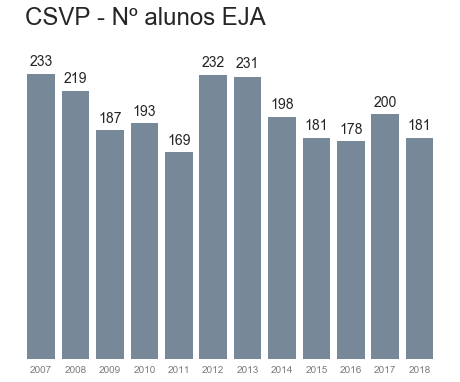

In [6]:
#ax = df_eja_escola[CO_SAO_VICENTE].plot.bar()
plt.style.use('seaborn')
bars = plt.bar(df_eja_escola[CO_SAO_VICENTE].index, 
               df_eja_escola[CO_SAO_VICENTE].values,
               color='lightslategray')
plt.xticks(df_eja_escola[CO_SAO_VICENTE].index, alpha=.6)
plt.yticks(alpha=.6)
plt.box(False)
plt.gca().set_title('CSVP - Nº alunos EJA ', va="bottom", ha="left", x=0.04, y=1.08, size=24)
plt.tick_params(labelleft=False)


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.02
                 *height,
                '%d' % int(height),
                ha='center', va='bottom',fontsize=14)
autolabel(bars)


In [7]:
df_eja_svp = df_eja[df_eja.id_escola==CO_SAO_VICENTE].groupby(['id_escola', 'ano']).agg(num_turmas=('num_matriculas', 'count'), total_matriculas=('num_matriculas', 'sum'))
df_eja_svp['rank'] = df_eja_svp.total_matriculas.rank(method="min").astype('int')
df_eja_svp.index = df_eja_svp.index.droplevel(0)
df_eja_svp

,num_turmas,total_matriculas,rank
ano,,,
2007,9,233,12
2008,10,219,9
2009,10,187,5
2010,10,193,6
2011,10,169,1
2012,11,232,11
2013,13,231,10
2014,13,198,7
2015,13,181,3


## Alunos no Ensino Médio

In [8]:
em_etapas = range(25, 39) #são vicente deveria ter só 25-27
df_medio = df_turmas_rio.query('id_etapa.isin(@em_etapas) and id_escola==@CO_SAO_VICENTE')

In [9]:
df_medio.head()

,index,ano,id_escola,id_etapa,id_municipio,id_uf,num_matriculas
31884,247979,2007,33063648,26.0,3304557,33,43
31961,248860,2007,33063648,27.0,3304557,33,44
32041,249783,2007,33063648,26.0,3304557,33,44
42641,358067,2007,33063648,25.0,3304557,33,34
42643,358070,2007,33063648,25.0,3304557,33,32


In [10]:
df_medio_por_ano = df_medio.groupby('ano').agg(total=('num_matriculas', 'sum'), no_turmas=('index', 'count'))
df_medio_por_ano

,total,no_turmas
ano,,
2007,357.0,10
2008,369.0,10
2009,361.0,10
2010,377.0,10
2011,353.0,10
2012,343.0,10
2013,355.0,10
2014,382.0,10
2015,369.0,10


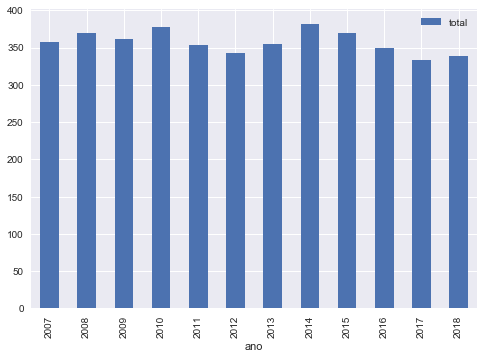

In [11]:
df_medio_por_ano.plot.bar(y='total');

In [12]:
df1 = df_medio.groupby(['ano','id_etapa'])['num_matriculas'].sum()


<Figure size 576x396 with 0 Axes>

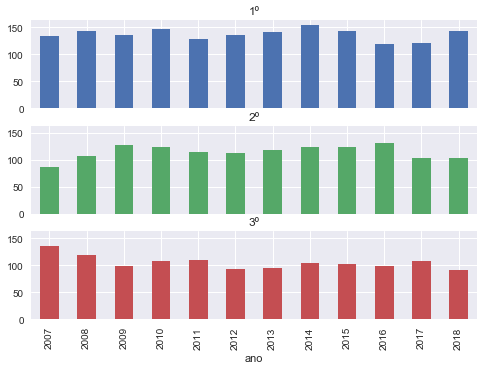

In [13]:
plt.set_cmap("Pastel2");
df = df1.unstack()
df.columns=['1º','2º','3º',]
axes = df.plot.bar(subplots=True, sharey=True);
for i in axes:
    i.legend().set_visible(False);

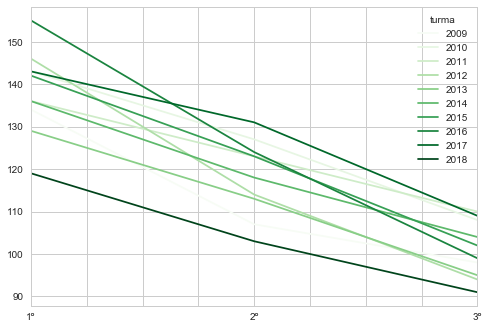

In [14]:
turmas = [(i+2, df.loc[i, '1º'], df.loc[i+1, '2º'],df.loc[i+2, '3º'],) for i in range(2007,2017)]
df_turmas = pd.DataFrame(data=turmas, columns=['turma', '1º','2º','3º'])    
df_turmas.set_index('turma', inplace=True)
plt.style.use('seaborn-whitegrid')
df_turmas.T.plot.line(cmap=plt.cm.Greens);


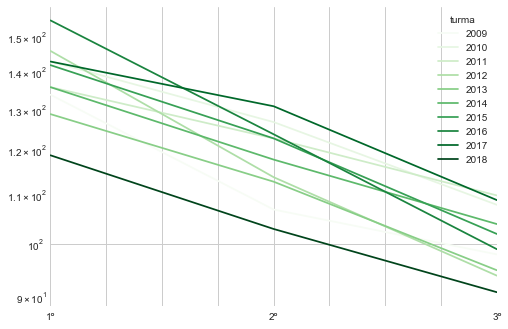

In [18]:

plt.style.use('seaborn-whitegrid')
ax = df_turmas.T.plot.line(cmap=plt.cm.Greens, logy=True);
plt.box(False)

In [16]:
df_turmas.T

turma,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1º,134,143,136,146,129,136,142,155,143,119
2º,107,127,123,114,113,118,123,124,131,103
3º,98,108,110,94,95,104,102,99,109,91


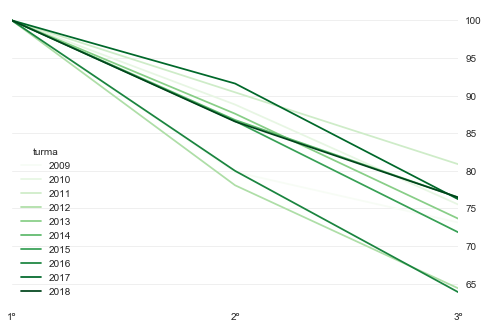

In [17]:
df_turmas_pct = df_turmas.T/df_turmas.iloc[:, 0] * 100
ax = df_turmas_pct.plot(cmap=plt.cm.Greens);
plt.tick_params(labelleft=False, labelright=True )
plt.tick_params(axis="x", grid_alpha=0)
plt.tick_params(axis="y", grid_alpha=0.3)
plt.box(False)



(50, 85)

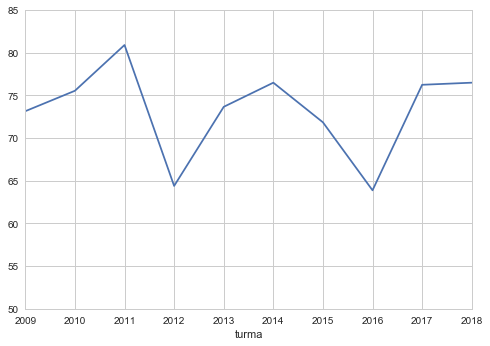

In [30]:
ax=df_turmas_pct.loc["3º"].plot.line();
ax.set_ylim(50,85)
